Name : Silviana <br>
Class : DIT/FT/2A/14<br>
Student ID : P1939213<br>
Module : MS0204 - Mathematics for AI

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Load Data 

In [2]:
iris = pd.read_csv('./iris.csv')

iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Standardization 

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


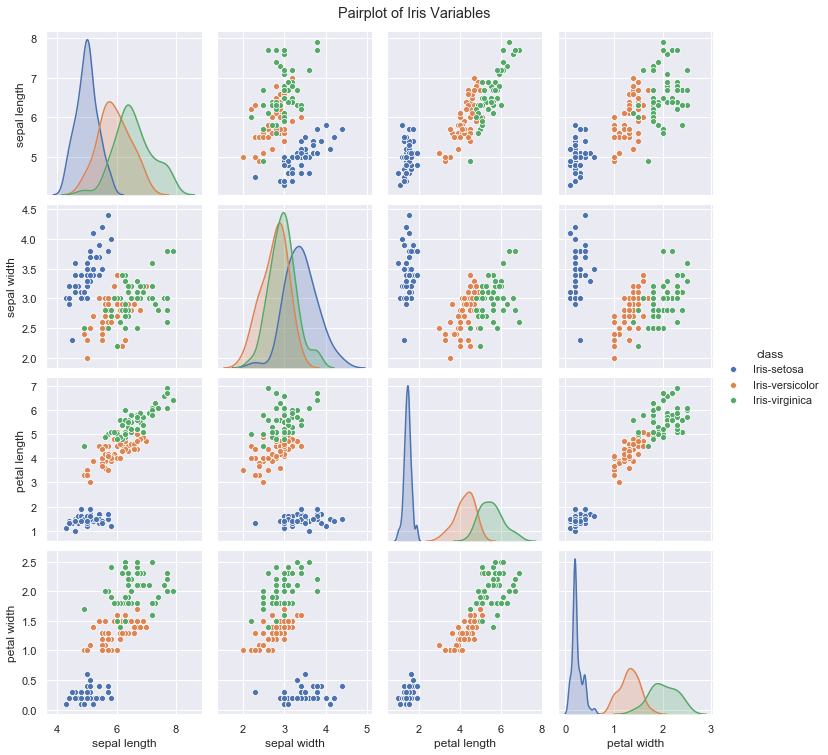

In [5]:
# fig = plt.subplots(figsize = (10, 10))
ax = sns.pairplot(iris, hue = 'class')
ax.fig.suptitle("Pairplot of Iris Variables", y = 1.03)

plt.savefig('iris_pairplot.png')
plt.show()

# Data Splitting

In [6]:
# select numeric and non numeric features
iris_num_features = iris.loc[:, iris.dtypes != 'object']
iris_non_num_features = iris.loc[:, iris.dtypes == 'object']
iris_num_columns = iris_num_features.columns

iris_num_features.shape

(150, 4)

In [7]:
corr_iris = np.corrcoef(iris_num_features)

eig_vals, eig_vecs = np.linalg.eig(corr_iris)

In [8]:
# import standardscaler
from sklearn.preprocessing import StandardScaler

# scale the data
iris_num_features = StandardScaler().fit_transform(iris_num_features)
iris_num_features = pd.DataFrame(iris_num_features, columns = iris_num_columns)

iris_num_features.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# PCA of All Features 

In [9]:
# import pca
from sklearn.decomposition import PCA

pca = PCA(n_components = 4).fit(iris_num_features)

pca_samples = pca.transform(iris_num_features)

## PCA Results Table 

In [10]:
def pca_results(data, pca_):
    '''
    Generates important attributes of PCA result as dataframe
    
    Parameters
    --------------------
    
    data (dataframe): input data
    pca_: trained pca model
    --------------------
    
    Returns    
    --------------------
    dataframe
        columns: eigenvalues, 
                 explained variance,
                 cumulative explained variance,
                 eigenvectors for each data column
    --------------------
    '''
    
    dimensions = ['PC {}'.format(i) for i, component in enumerate(pca_.components_, start = 1)]

    # eigenvectors (components)
    components = pd.DataFrame(np.round(pca_.components_, 4), columns = data.keys())
    components.index = dimensions
    
    # eigenvalues
    evalues = pca_.explained_variance_.reshape(len(pca_.components_), 1)
    eigenvalues = pd.DataFrame(np.round(evalues, 4), columns  = ['Eigenvalue'])
    eigenvalues.index = dimensions
    
    # explained variance
    ratios = pca_.explained_variance_ratio_.reshape(len(pca_.components_), 1)
    explained_variance_ratio = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    explained_variance_ratio.index = dimensions
    
    # cumulative explained variance
    cum_ratios = pca_.explained_variance_ratio_.cumsum().reshape(len(pca_.components_), 1)
    cum_explained_variance_ratio = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_explained_variance_ratio.index = dimensions
    
    # construct final dataframe
    pca_result_df = pd.concat([eigenvalues, explained_variance_ratio, cum_explained_variance_ratio, components], axis = 1)
    
    return pca_result_df

In [11]:
iris_pca_results = pca_results(iris_num_features, pca)
iris_pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,sepal length,sepal width,petal length,petal width
PC 1,2.9304,0.7277,0.7277,0.5224,-0.2634,0.5813,0.5656
PC 2,0.9274,0.2303,0.9580,0.3723,0.9256,0.0211,0.0654
PC 3,0.1483,0.0368,0.9948,-0.7210,0.2420,0.1409,0.6338
PC 4,0.0207,0.0052,1.0000,-0.2620,0.1241,0.8012,-0.5235


## Screeplot 

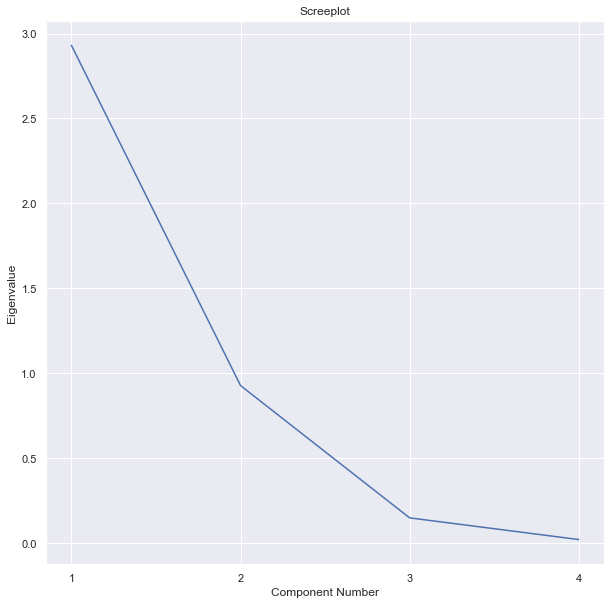

In [12]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10, 10))

ax.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlabel = 'Component Number', ylabel = 'Eigenvalue', title= 'Screeplot')
plt.savefig('iris_screeplot.png')
plt.show()

# Dimension Reduction 

In [13]:
pca2 = PCA(n_components=2).fit(iris_num_features)
pca_score = pd.DataFrame(pca2.transform(iris_num_features), columns = ['PC1', 'PC2'])

In [14]:
iris_pca2_results = pca_results(iris_num_features, pca2)
iris_pca2_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,sepal length,sepal width,petal length,petal width
PC 1,2.9304,0.7277,0.7277,0.5224,-0.2634,0.5813,0.5656
PC 2,0.9274,0.2303,0.9580,0.3723,0.9256,0.0211,0.0654


## Loading Plot

In [15]:
def loading_plot(data, pca_, width = 5, height = 5, margin = 0.5):
    '''
    Generates the loading plot
    
    Parameters
    --------------------
    data (dataframe) : input data
    pca_ : trained pca model
    width (numeric, optional) : figure width
    height (numeric, optional) : figure height
    margin (numeric, optional) : margin for xlim and ylim
    --------------------
    
    Returns    
    --------------------
    AxesSubplot
        Loading plot of all principal components
    --------------------
    '''
    fig, ax = plt.subplots(figsize = (width, height))
    
    # Set limits
    x_min = min(pca.components_[0, :].min(), 0) - margin
    x_max = max(pca.components_[0, :].max(), 0) + margin
    y_min = min(pca.components_[1, :].min(), 0) - margin
    y_max = max(pca.components_[1, :].max(), 0) + margin
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Scaling factor for text position
    x_offset = -0.045
    y_offset = 0.01

    
    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], 
                 head_width = 0.05, 
                 head_length = 0.1,
                 color = 'red')
        
        ax.text(v[0] + x_offset, v[1] + y_offset, 
                data.columns[i], 
                color='black', 
                ha='right', 
                va='center', 
                fontsize=14)

    
        
    plt.plot([x_min, x_max], [0, 0], color = 'k', linestyle='--', linewidth = 1)
    plt.plot([0, 0], [y_min, y_max], color = 'k', linestyle='--', linewidth = 1)
    ax.set_xlabel('PC1', fontsize = 14)
    ax.set_ylabel('PC2', fontsize = 14)
    ax.set_title('Loading Plot', fontsize = 14)
    
    return ax

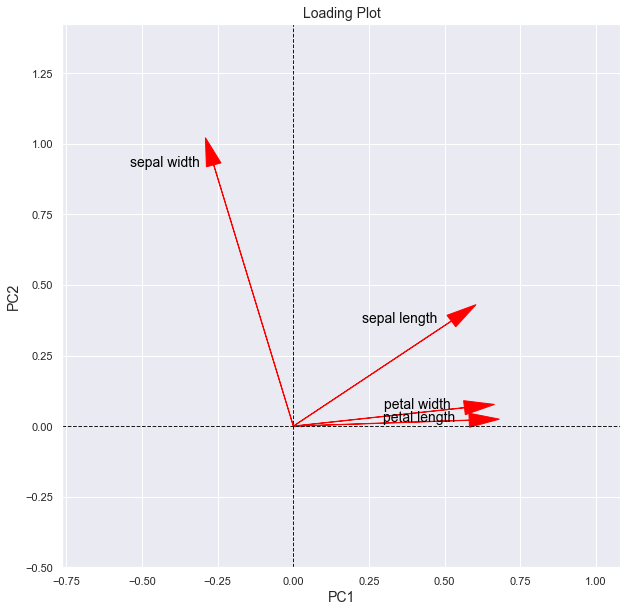

In [16]:
iris_lp = loading_plot(iris_num_features, pca2, width = 10, height = 10)
plt.savefig('iris_loadingplot.png')
plt.show()

## Score Plot

In [17]:
iris_full_data = pd.concat([iris_num_features, iris_non_num_features], axis = 1)

In [18]:
def scoreplot(data, scores, pca, width = 5, height = 5, margin = 0.5):
    fig, ax = plt.subplots(figsize = (width, height))
    ax = sns.scatterplot(x = 'PC1', y = 'PC2', data = scores, hue = data["class"])
    
    x_min = min(scores['PC1'].min(), 0) - margin
    x_max = max(scores['PC1'].max(), 0) + margin
    y_min = min(scores['PC2'].min(), 0) - margin
    y_max = max(scores['PC2'].max(), 0) + margin
    
    ax.set_xlim(x_min, x_max)
    ax.set_xlim(y_min, y_max)
    
    ax.set_title('Score Plot', fontsize = 14)
    
    plt.plot([x_min, x_max], [0, 0], color = 'k', linestyle = '--', linewidth = 1)
    plt.plot([0, 0], [y_min, y_max], color = 'k', linestyle = '--', linewidth = 1)
    
    return ax

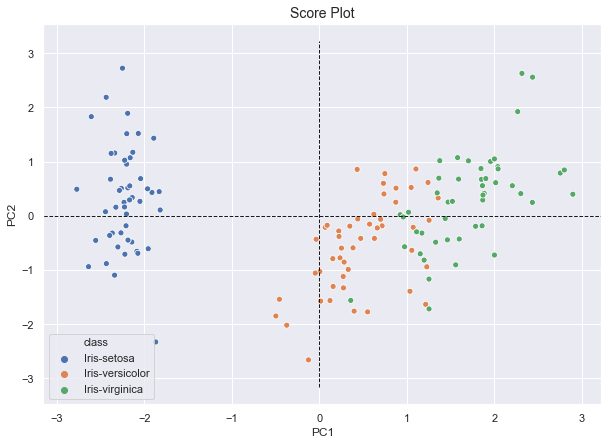

In [20]:
iris_scoreplot = scoreplot(iris_full_data, 
                           pca_score, 
                           pca2, 
                           width = 10,
                           height = 7)
plt.savefig('iris_scoreplot.png')
plt.show()